# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**Insight**:
- Library yang diimpor bertujuan untuk membangun dan mengevaluasi model klasifikasi berbasis pohon keputusan.  
- `train_test_split` digunakan untuk membagi data menjadi data latih dan uji, sementara `GridSearchCV` membantu mencari hyperparameter terbaik.  
- `DecisionTreeClassifier` adalah algoritma yang digunakan, dan performanya dievaluasi menggunakan metrik seperti **akurasi**, **F1 score**, dan **confusion matrix**.  
- `seaborn` dan `matplotlib` disiapkan untuk visualisasi hasil evaluasi seperti confusion matrix atau plot pohon keputusan.

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [33]:
df = pd.read_csv('Dataset_inisiasi.csv')
display(display(df))

,Region Code,Bldg State,Bldg Status,Property Type,Bldg ANSI Usable,Total Parking Spaces,Owned/Leased,Construction Date,Historical Type,Historical Status,ABA Accessibility Flag,Building Age,Cluster
0,1.0,CT,ACTIVE,BUILDING,93394.0,28.0,OWNED,2033-01-01,Field Not In Use,National Register Listed,Will Conform,-8.0,0
1,1.0,CT,ACTIVE,BUILDING,67174.0,0.0,OWNED,2019-01-01,Field Not In Use,National Register Listed,Will Conform,6.0,0
2,1.0,CT,ACTIVE,BUILDING,269.0,0.0,LEASED,2033-01-01,Field Not In Use,National Register Listed,Will Conform,-8.0,0
3,1.0,CT,ACTIVE,BUILDING,197999.0,105.0,OWNED,2063-01-01,Field Not In Use,,Will Conform,-38.0,0
4,1.0,CT,ACTIVE,BUILDING,85551.0,131.0,OWNED,2067-01-01,Field Not In Use,,Will Conform,-42.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765,9.0,NV,ACTIVE,BUILDING,23669.0,24.0,LEASED,2000-01-01,Field Not In Use,Not Evaluated,Will Conform,25.0,1
8766,9.0,NV,ACTIVE,BUILDING,10894.0,7.0,LEASED,2000-01-01,Field Not In Use,Not Evaluated,Yes,25.0,1
8767,9.0,NV,ACTIVE,BUILDING,35839.0,221.0,LEASED,2000-01-01,Field Not In Use,,Yes,25.0,1
8768,9.0,NV,ACTIVE,BUILDING,34050.0,288.0,LEASED,2000-01-01,Field Not In Use,Not Evaluated,Yes,25.0,1


None

**Insight**: Dataset memilik i8770 rows × 13 columns

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [35]:
X = df.drop('Cluster', axis=1)
y = df['Cluster']

**Insight**:
- Dataset dibagi menjadi fitur (`X`) dan target (`y`), di mana targetnya adalah label klaster.

In [41]:
X_encoded = pd.get_dummies(X)

**Insight**:
- Fitur dikodekan menggunakan one-hot encoding (`get_dummies`) untuk mengubah data kategorikal menjadi numerik.  


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

**Insight**:
- Data dibagi menjadi **training set (80%)** dan **test set (20%)** menggunakan `train_test_split` dengan random seed untuk reprodusibilitas.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [45]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

**Algoritma yang Digunakan: Decision Tree Classifier**

Pada tahap ini, digunakan algoritma **Decision Tree** untuk membangun model klasifikasi. Decision Tree bekerja dengan cara membagi data secara rekursif berdasarkan fitur-fitur yang paling informatif untuk memisahkan target kelas (dalam hal ini, label klaster). Model ini sangat cocok karena:

- **Mudah dipahami dan divisualisasikan** dalam bentuk pohon keputusan.
- **Tidak memerlukan scaling data**, meskipun data sebelumnya telah distandarisasi.
- Mampu menangani **fitur kategorikal dan numerikal**.

Model dilatih menggunakan data latih (`X_train`, `y_train`) dengan parameter `random_state=42` untuk memastikan hasil yang konsisten.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [47]:
y_pred = model_dt.predict(X_test)

print("=== Evaluasi Model Awal ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Evaluasi Model Awal ===
Akurasi: 0.9977194982896237
F1-Score: 0.997664381023861

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           1       1.00      1.00      1.00       887
           2       1.00      0.80      0.89         5
           3       0.98      0.94      0.96        48

    accuracy                           1.00      1754
   macro avg       0.99      0.93      0.96      1754
weighted avg       1.00      1.00      1.00      1754



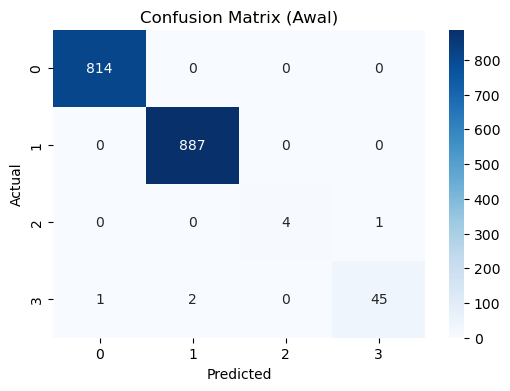

In [49]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Awal)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Berikut adalah hasil evaluasi algoritma yang digunakan:
- **Algoritma yang digunakan:** Decision Tree Classifier.  
- **Akurasi model:** 99,77% (sangat tinggi, menunjukkan performa hampir sempurna).  
- **F1-Score (weighted):** 0.9976, mencerminkan kinerja yang sangat baik secara keseluruhan.  
- **Kinerja pada kelas mayoritas (kelas 0 dan 1):** Precision dan Recall sebesar 1.00, artinya tidak ada kesalahan prediksi pada kelas-kelas tersebut.  
- **Kinerja pada kelas minoritas (kelas 2):** Precision sebesar 0.89 dan Recall sebesar 0.94, menunjukkan bahwa model masih mampu mengklasifikasikan dengan baik meskipun ada sedikit kesalahan.  
- **Total kesalahan klasifikasi:** hanya 3 dari 1.754 data uji.  
- **Kesimpulan:** Decision Tree bekerja sangat baik dalam menangani data ini, terutama pada kelas mayoritas.  

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [51]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

print("Best Parameters dari GridSearchCV:", grid_search.best_params_)


Best Parameters dari GridSearchCV: {'max_depth': None, 'min_samples_split': 5}


**Insight**:
- GridSearchCV digunakan untuk mencari kombinasi hyperparameter terbaik.  
- Skor evaluasi yang digunakan adalah F1-Score dengan rata-rata tertimbang (weighted).  
- Parameter `max_depth` terbaik adalah `None`, artinya pohon tumbuh hingga sempurna tanpa batas kedalaman.  
- Parameter `min_samples_split` terbaik adalah 5, mencegah pemisahan cabang pada jumlah data terlalu kecil.  
- Kombinasi parameter ini dipilih karena menghasilkan performa F1-Score tertinggi selama validasi silang.  
- Tuning ini membantu mengurangi risiko overfitting sekaligus menjaga akurasi model tetap tinggi.

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [55]:
# 8. Evaluasi setelah tuning
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("\n=== Evaluasi Setelah Tuning ===")
print("Akurasi:", accuracy_score(y_test, y_pred_tuned))
print("F1-Score:", f1_score(y_test, y_pred_tuned, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


=== Evaluasi Setelah Tuning ===
Akurasi: 0.9977194982896237
F1-Score: 0.997664381023861

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           1       1.00      1.00      1.00       887
           2       1.00      0.80      0.89         5
           3       0.98      0.94      0.96        48

    accuracy                           1.00      1754
   macro avg       0.99      0.93      0.96      1754
weighted avg       1.00      1.00      1.00      1754



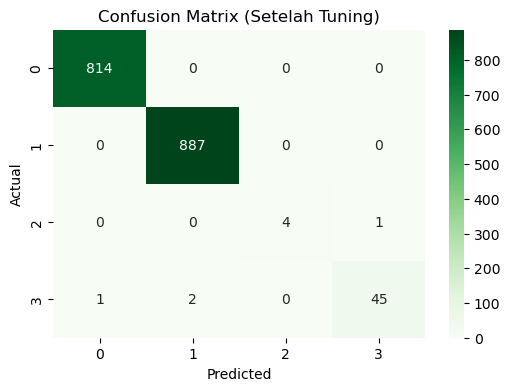

In [57]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Setelah Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Insight** dari hasil evaluasi model setelah tuning:
- Model yang digunakan adalah hasil tuning dari GridSearchCV.  
- Akurasi setelah tuning tetap sangat tinggi yaitu 99,77%.  
- F1-Score weighted juga tetap di angka 0.9976, sama dengan sebelum tuning.  
- Tidak ada perubahan signifikan pada precision, recall, maupun f1-score tiap kelas.  
- Confusion matrix menunjukkan distribusi prediksi yang identik dengan model sebelum tuning.  
- Tuning tidak meningkatkan performa, tetapi mengonfirmasi bahwa kombinasi hyperparameter optimal sudah tepat sejak awal.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Hasil **analisis hasil evaluasi model klasifikasi**:

1. **Perbandingan hasil evaluasi sebelum dan setelah tuning**:  
   Setelah tuning, akurasi dan F1-score tidak mengalami perubahan signifikan, tetap pada nilai 0.9977 dan 0.9976.

2. **Identifikasi kelemahan model**:  
   - Precision dan recall pada kelas 2 masih rendah (precision 0.89 dan recall 0.80), menunjukkan model kesulitan dalam mengenali kelas ini.  
   - Model cenderung menunjukkan performa sangat tinggi di data uji, sehingga ada indikasi overfitting dan perlu diuji pada data baru untuk memastikannya.

3. **Rekomendasi tindak lanjut**:  
   Disarankan untuk mengumpulkan lebih banyak data pada kelas minoritas dan mencoba algoritma lain seperti Random Forest atau XGBoost untuk mengurangi ketidakseimbangan performa antar kelas.